# Titanic Survival Prediction Using Machine Learning


The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious passenger ship of its time. 
Sadly, the British ocean liner sank on 15th of April 1912, killing over 1500 people while just 705 survived.
In this article, we analyse the Titanic data set and make two predictions. 
One prediction to see which passengers on board the ship would survive and then another prediction to see 
if we would’ve given the set of variables.


The following packages and libraries were imported to aid with the completion of this task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset

The titanic data set was then imported using Pandas. It contains information of 887 passengers that embarked the ship. The data included the age, class number of siblings/spouses present on the ship, number of parents or children on board, the fare the passengers paid, the gender of each passenger and whether or not the passanger had survived. Firstly, we had to remove the passenger's name column as it is not quantifiable data. We also had to define the genders of the passengers. They were originally defined as 'male' and 'female', and we defined male as 1 and female as 0.


In [2]:
titanic = pd.read_csv('titanic.csv')

titanic.drop(["Name"], axis = 1, inplace = True) 
sex=pd.get_dummies(titanic['Sex'],drop_first=True)  #creates dummie column for sex where 1 is male 
titanic=pd.concat([titanic,sex],axis=1) # adds the dummie column to the data set 
titanic.drop(["Sex"], axis = 1, inplace = True)  #replaces the sex column with dummie column 
titanic.head(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Analysis of the dataset

Before we trained our model, we wanted to get an understanding of what factors implemented survival on the ship, so we visualised some of the data to gain an understanding of the dataset.

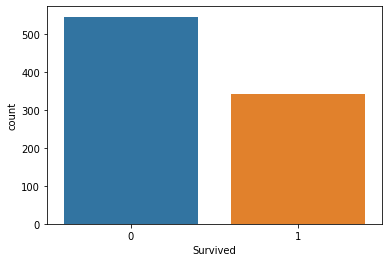

In [3]:
#Graph to visulaise number of survivors
sns.countplot(  titanic['Survived'])

The above graph can be used to approximate the number of people aboard that died and those that survived. The main point to take away from this chart is that more people aboard died than survived.

In [4]:
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0] [feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked = False, figsize=(10,5))
    

Text(0, 0.5, 'Count')

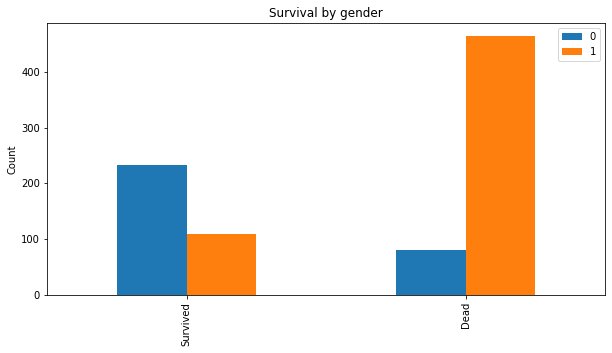

In [5]:
bar_chart('male')
plt.title('Survival by gender')
plt.ylabel('Count')

Perhaps one of the most important factors to look at is gender and this bar graph shows the numbers of passengers that died and survived by gender. It shows clearly that of those that survived, most were female and most of those that died were male. This makes sense as it is likely that women were given priority over men.

To express this numerically, approximately 70% of survivors were female according to the chart.

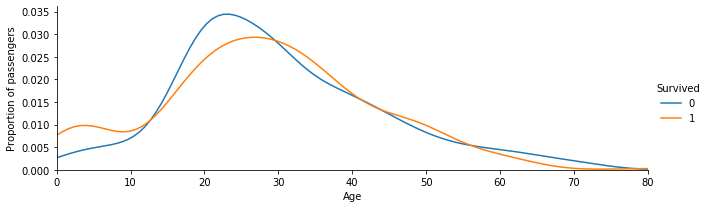

In [6]:
facet = sns.FacetGrid(titanic, hue = "Survived", aspect = 3)
facet.map(sns.kdeplot, 'Age')
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
facet.set_ylabels('Proportion of passengers')
plt.show()

#a means of plotting age

Another important factor to look at is age. The above graph shows the distribution of survival with age. Young children aged 13 and under were more likely to survive most likely due to being given priority.

Ages from about 14 to 30 were found to more likely die than survive due to perhaps assisting other passengers before saving themselves.

Passengers aged 30 to 55 were more likely to survive while passengers over 55 were more likely to die perhaps due to the freezing conditions or sacrificing themselves for passengers younger than them.

Text(0, 0.5, 'Count')

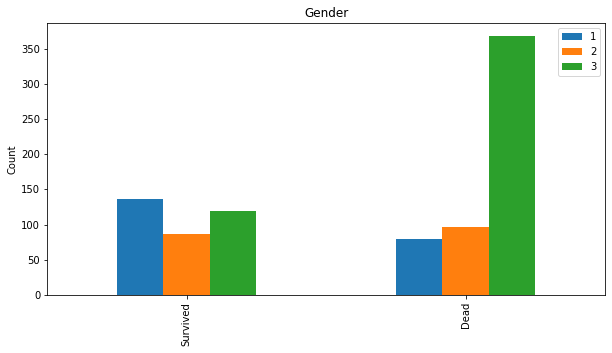

In [7]:
bar_chart('Pclass')
plt.title('Gender')
plt.ylabel('Count')

The above bar chart shows the number of passengers that survived and died, depending on their class aboard the ship.

Focusing on the bars on the right which show the number of passengers that died, it is unfortunate to realise that wealthier passengers in more expensive classes were prioritised when it came to being rescued as, by far, the majority of passengers that died were from Class 3.

Text(0, 0.5, 'Count')

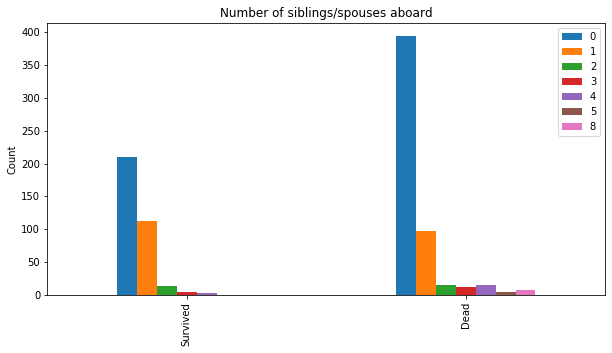

In [8]:
bar_chart('Siblings/Spouses Aboard')
plt.title('Number of siblings/spouses aboard')
plt.ylabel('Count')

This chart has a bit more information to look at. But the general trend it depicts is that not only did most passengers aboard have no siblings or spouses but they also had a higher chance of not surviving as a result; having a survival rate of just 34-35%.

Seeing as the graphs show a decreasing trend as number of siblings/spouses increase, it is likely that a passenger would save them rather than themselves.

The fact that the survival rate of passengers with 5-8 siblings/spouses is 0% is very important to think about. This is likely because these passengers with larger families were in Class 3.

Interestingly, more people with one sibling or spouse survived rather than died but only just; suggesting that one sibling/spouse is the magic number.

Text(0, 0.5, 'Count')

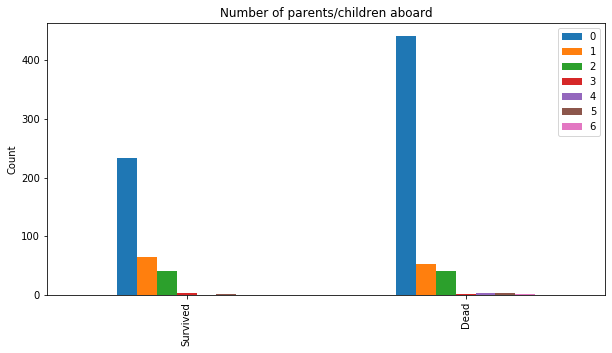

In [9]:
bar_chart('Parents/Children Aboard')
plt.title('Number of parents/children aboard')
plt.ylabel('Count')

Similar to the previous chart, this one relates to family size and depicts the number of passengers that survived and died based on the number of parents or children with them.

Like the previous chart, this one shows that most passengers on board had smaller families and, overall, passengers with no family with them were not a priority and subsequently many more died than survived. However, like the previous chart, of those with only one parent or child more survived than died suggesting that 1 parent/child is the magic number again although this could just be coincidence.

Interestingly, having 4 or 6 parents/children with you reduced your survival rate to 0% which could potentially be explained by those passengers being in Class 3.

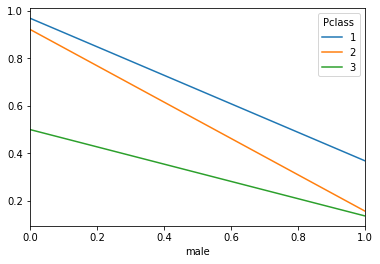

In [10]:
#Look at survival rate by sex and class
titanic.pivot_table('Survived', index='male', columns='Pclass').plot()

Looking at this chart allowed us to cross-analyse the factors of passenger class and gender. It again confirms that being male more likely would lead to your demise as too would being in a lower passenger class and vice versa.

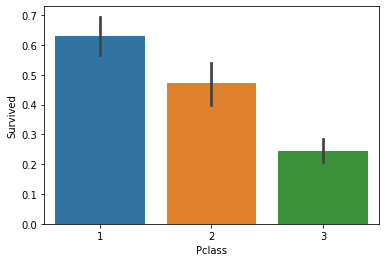

In [11]:
#plot the survival rate of each class
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic)

Plotting the survival rate of all passengers by passenger class allows us to compare the three classes more numerically. The chart shows that over 60% of passengers in Class 1 survived, while approximately 48% in Class 2 survived but only 25% in Class 3 survived.

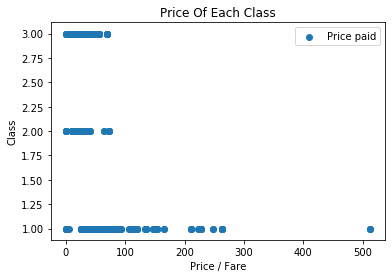

In [12]:
#Plot the Prices Paid Of Each Class
plt.scatter( titanic['Fare'], titanic['Pclass'], label = 'Price paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

Using our understanding of survival liklihood for different passenger classes, the above chart shows us that there is a similar correlation between that and the price paid for a ticket. I.e. the more a passenger paid for a ticket, the more likely it is they survived.

# Training the data 

We split the dataset into dependent and independent. Independent was if the passenger survived or not and dependent details of passengers we could potentially explain the chances of survival.

In [13]:
x_dependent=titanic.drop('Survived',axis=1) #dependent variables
y=titanic['Survived'] #independent variable


The data was split into training data and testing data. We opted for an 80:20 approach where 80% of the data is used to train the model and the rest of the data to test the data. In terms of spitting, we choose a simple approach of using the first 80% of passengers for training and the last 20% for testing. As the data was already randomly sorted there was no need to perform a random split.

In [14]:
x=x_dependent.to_numpy()
p=710 #for training we're use the first 80% of passengers 
x=x[:p]
y=y[:p]


# Logistic Regression

Given a set of inputs x, we wanted to assign either 0 or 1 (survived or not survived). Logistic regression models the probability that each input belongs to a particular category.

To generate probabilities, logistic regression uses a function that gives outputs between 0 and 1 for all values of x. There are many functions that meet this description, but the used in this case is the logistic function. This is commonly referred to as the Sigmoid function which is represented below:

$$f\left( t \right)=\frac{\exp \left( t \right)}{1+\exp \left( t \right)}$$
 

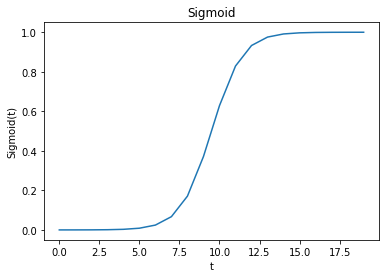

In [15]:
def sigmoid(t):

    sigmoid = 1/(1 + np.exp(-t))  
    return sigmoid

t = np.linspace(-10, 10, 20)
plt.plot(sigmoid(t))
plt.xlabel("t") 
plt.ylabel("Sigmoid(t)") 
plt.title("Sigmoid")

plt.show() 

## Loss function
Functions have parameters/weights (represented by w in our notation) and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function, defined as:
$$−\log \left( p\left( y|X,w \right) \right)=\sum_{i}^{s}{\log \; 1+\exp \left( <x\; ^{~},w> \right)\; −y<x\; ̃,w>}\; \;             for\; x\; =\; \left( 1,x_{i} \right)^{T}\; and\; y_{i}\; \in \; 0,1.$$



Our goal was to minimise the loss function and the way we achieved this was by increasing/decreasing the weights, i.e. fitting them. We needed to determine what parameters should be biggers and what parameters should be smallers. This was given by the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters:

$$\; \; calculate\; loss\; =\frac{1}{m}X^{T}\left( f\left( Xw \right)-y \right)\; \;$$


Where m is the number of passngers that were trained in our model.


In [16]:
loss = np.empty(0)
tx = np.c_[np.ones((y.shape[0], 0)), x]
a = tx.T.dot(tx)
b = tx.T.dot(y)
inv_a = np.linalg.inv(a)
w = inv_a.dot(b)

def calculate_loss(y, tx, w):
  
    num = y.shape[0]
    a = tx.dot(w)
    loss = -(y * np.log(sigmoid(a)) + (1 - y) * np.log(1 - sigmoid(a)))
    return (np.sum(loss))/num 
    
calculate_loss(y, tx, w)
def calculate_gradient(y, tx, w):
    num = y.shape[0]
    grad = tx.T.dot((sigmoid(tx.dot(w))-y))
    return grad / num


tau = 0.01 
def learning_by_gradient_descent(y, tx, w, tau):
    loss = calculate_loss(y,tx,w)
    grad = calculate_gradient(y,tx,w)
    w = w - (tau*grad)
    
    return loss, w

learning_by_gradient_descent(y, tx, w, tau)

(0.7015107627220297,
 array([ 0.13306668, -0.0566588 , -0.01692828, -0.01567942, -0.01876051,
        -0.43854973]))

# Performing multiple iterations
After we determined the initial weights, we can calculate the optimal weights by using the iterative gradient descent formula below:

$$w^{k+1}=\; w^{k}\; −\; \tau ∇\mbox{E}\left( w^{k} \right)\; \; \; $$

When first performing the iteration we discovered problems with the convergence of the loss function as the learning rate was too large resulting in the loss function fluctuating. Therefore we had to decrease the learning rate by a factor of 10 in order to prevent those fluctuations from occurring and allowing out loss to converge to an appropriate value.


<br>
We opted for the use of 64000 iterations. This allowed the loss to converge to an appropriate value to maximise the accuracy of our learning model, as a small change in the loss created large influence on the accuracy. At the same time, too many iterations would result a large amount of computing power and out programme crashing.

In [17]:
losses = []
tau = 0.001
for i in range (64000):
    
    loss, w = learning_by_gradient_descent(y, tx, w, tau)
    losses.append(loss)
    
    if i % 1000 == 0:
        print ('Iteration:',i)
        print ('Loss:', loss)

Iteration: 0
Loss: 0.7015107627220297
Iteration: 1000
Loss: 0.5792422385335997
Iteration: 2000
Loss: 0.5674170507592622
Iteration: 3000
Loss: 0.5606460438767114
Iteration: 4000
Loss: 0.5556686327082805
Iteration: 5000
Loss: 0.551519500326061
Iteration: 6000
Loss: 0.5478780988369346
Iteration: 7000
Loss: 0.5446175155064987
Iteration: 8000
Loss: 0.5416735972522753
Iteration: 9000
Loss: 0.5390049573130773
Iteration: 10000
Loss: 0.5365801045150043
Iteration: 11000
Loss: 0.534372981247493
Iteration: 12000
Loss: 0.5323612047174769
Iteration: 13000
Loss: 0.5305252233095488
Iteration: 14000
Loss: 0.5288478127924157
Iteration: 15000
Loss: 0.5273137202778252
Iteration: 16000
Loss: 0.5259093872086745
Iteration: 17000
Loss: 0.5246227234846956
Iteration: 18000
Loss: 0.5234429190759183
Iteration: 19000
Loss: 0.522360284973935
Iteration: 20000
Loss: 0.5213661178391001
Iteration: 21000
Loss: 0.5204525840980928
Iteration: 22000
Loss: 0.5196126201641004
Iteration: 23000
Loss: 0.5188398461192286
Iteratio

# Visualising the loss

To determine if the cost function was indeed converging we plotted cost against iterations. Clearly, as the number of iteration increases, the cost function converges to around 0.5.

Text(0, 0.5, 'Loss')

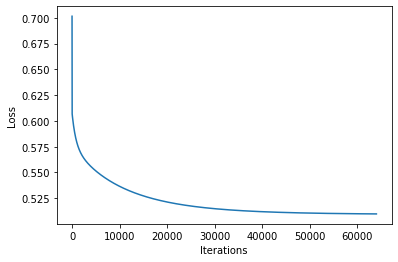

In [18]:
plt.plot(losses) #visual indicator to show the convergence of the loss functions 
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Testing 

We used the remaining 20% of the data to test our model and examine how representative our weights are. Using the Sigmoid function we achieve the probability of our passenger belonging to class 1. Then taking all probabilities greater 0.5 equal to class 1 and less than 0.5 to class 0 were able to determine if a passenger survived or not.

In [19]:
#the remaining 20% is going to be used for testing 

dependent_data= titanic.drop('Survived',axis=1)
independent_data=titanic['Survived']

testing_datax=dependent_data[-178:] 
testing_datay=independent_data[-178:] 
matrix=np.dot(testing_datax,w)

threshold1 = 0.5
predictor = sigmoid(matrix)

#converting the output of the sigmoid to binary to classify surivival

for i in range (0, 178):
    if predictor[i]>threshold1:
        predictor[i] = 1 
    else:
        predictor[i] = 0 
i = i+1

In [20]:
print (sum(predictor==1)) # number of people to survive prediction
print (sum(testing_datay==1)) # number of people that actually survived 
print (sum(predictor==0))
print (sum(testing_datay==0))


accuracy = np.mean(predictor==testing_datay)*100 # comparing the average predicted surivial rate with actual survival rate  
print ("Accuracy" , accuracy)

56
64
122
114
Accuracy 82.02247191011236


# Making a prediction 

We then wanted to see if we would survive the titanic ourselves! Therefore we created variables to take input from the user which would then multiply by the optimised weights, and output whether survived or not.  


In [ ]:
joinedlist = []

pclass = int(input("What class were you travelling on?\n"))
age = int(input("What is your age?\n"))
sibspou = int(input("How many Siblings/Spouses did you have on board?\n"))
parchild = int(input("How many parents/children did you have on board?\n"))
fare = int(input("How much was your ticket?\n"))
gender = int(input("What is your gender? Enter 1 for male or 0 for female.\n"))

joinedlist.append(pclass)
joinedlist.append(age)
joinedlist.append(sibspou)
joinedlist.append(parchild)
joinedlist.append(fare)
joinedlist.append(gender)

result = np.matmul(joinedlist, w)

survival = sigmoid(result)
if survival>threshold1:
    print("You have survived")
else:
    print("You have not survived")

print(survival)

What class were you travelling on?
1
What is your age?
18
How many Siblings/Spouses did you have on board?
5
How many parents/children did you have on board?
2


# Comparing with Sklearn model

As a form of reference we ran the dataset against the Sklearn model. The model produced an accuracy of 79.6% suggesting that our model produces more accurate predictions. 

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression (random_state = 0)
log.fit(x, y)

print('Accuracy: ', log.score(x, y))

Accuracy:  0.795774647887324


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Conclusion

The variables that have the most influence on survival are the following:
<br>
1- Gender 
<br>
2- Siblings/Spouses Aboard	
3- Parents/Children Aboard
<br>
4- Pclass
<br>
5- Fare
<br>
6- Age
<br>

Looking at the values of our weights, they paint a clear picture that tells us how each factor impacts the likelihood of survival. It is immediately apparent that the gender had the biggest effect (because it is the most negative weight) and specifically confirms that male passengers are least likely to have survived. This aligns with our initial thoughts from analysis of the graphs. 

The next two factors that would make it less likely for a passenger to survive are the number of siblings/spouses and the number of parents/children they have i.e. their family size. The weights indicate that the bigger a passenger’s family size, the less likely they are to survive. This again fits with what we thought from looking at the graphs but also now lets us know how important these factors are in terms of survival which is something that data visualisation can't always tell you.

Our weights also suggest that the older a passenger is, the more likely they are to survive. However, the value of the weight is the smallest positive value and confirms what we found from our graphical analysis which is that the oldest passengers still died. Importantly, age does not hold as big a precedent as fare price. Our model tells us that the more a passenger paid for their ticket, the more this adds to their chances of surviving however, being in a higher passenger class adds the most to a passenger's likelihood of surviving.

Summarising, the easiest way to maximise your chances of surviving are to be a female in the highest passenger class.

